# 1.A: Basic radioactivity analysis

**Question:** What is the activity of this radioactive source? 

To answer this question, we will pretend to use a detector in the lab that counts the number of decays in a fixed period of time.
The cells below are set up to work through the analysis. Most of the necessary python code is added during the tutorial itself.

In [1]:
# Import modules needed for this tutorial

from trisep.RadiationCounter import RadiationCounter
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background') # only include this if you use a dark background for Jupyter Lab

### Construct the lab detector

In [3]:
lab_detector = RadiationCounter()

Lab radiation counter built. Default counting time is 10.0 seconds.


### Make a measurement:
 - set the timer to 10 seconds
 - insert the radioactive source
 - get the number of decays

In [4]:
lab_detector.set_counting_time(10) # specified in seconds: You will have to wait that long to get the result!
counting_time = lab_detector.get_counting_time() # read back the time to make sure it was set correctly
lab_detector.insert_lab_source() # put the radioactive source into the detector

lab_detector.start() # reset counter and start timer
count = lab_detector.get_count() # get the number of counts

The lab source has been inserted into the counter.
Measurement has begun. Please wait 10 seconds.
Number of counts observed in 10 seconds was 2


In [5]:
# Estimate the activity from these data

activity = count / counting_time # in Bq
print(f"Activity: {activity:.2f} Bq")

Activity: 0.20 Bq


### Make several measurements

In [6]:
# Make a python list having the counts from five measurements

counts = []
for _ in range(5):
    lab_detector.start() # reset counter and start timer
    count = lab_detector.get_count() # get the number of counts
    counts.append(count)
print("Counts from measurements:", counts)


Measurement has begun. Please wait 10 seconds.
Number of counts observed in 10 seconds was 5
Measurement has begun. Please wait 10 seconds.
Number of counts observed in 10 seconds was 6
Measurement has begun. Please wait 10 seconds.
Number of counts observed in 10 seconds was 4
Measurement has begun. Please wait 10 seconds.
Number of counts observed in 10 seconds was 7
Measurement has begun. Please wait 10 seconds.
Number of counts observed in 10 seconds was 5
Counts from measurements: [5, 6, 4, 7, 5]


### Show a histogram

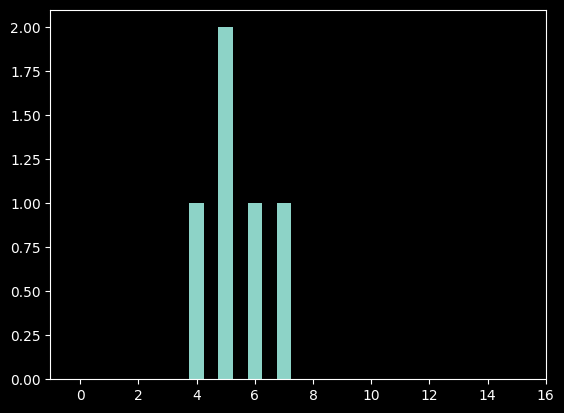

In [7]:
# The following will show how frequently different counts were seen

plt.hist(counts,bins=np.arange(0.,16.,0.5), align='left')
plt.show()

### Summarize your measurements with descriptive statistics

In [9]:
# Calculate the mean and standard deviation of the counts

mean_count = np.mean(counts)
std_count = np.std(counts, ddof=1)  # use ddof=1 for sample standard deviation
print(f"Mean count: {mean_count:.2f}, Standard deviation: {std_count:.2f}")

Mean count: 5.40, Standard deviation: 1.14


## Report your findings using typical notation: activity = $\hat{a} \pm \sigma_a$ Bq

In [10]:
# Report the activity with uncertainty of the activity

activity_mean = mean_count / counting_time  # in Bq
activity_std = std_count / counting_time  # in Bq
print(f"Activity: {activity_mean:.2f} ± {activity_std:.2f} Bq")

Activity: 0.54 ± 0.11 Bq


In [11]:
# Try again, this time using the error in the mean for the uncertainty of the activity
activity_error = activity_std / np.sqrt(len(counts))  # standard error of the mean
print(f"Activity: {activity_mean:.2f} ± {activity_error:.2f} Bq")

Activity: 0.54 ± 0.05 Bq
